# 1. Importing necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve


from pickle import dump,load

import warnings
warnings.filterwarnings('ignore')

# 2. Data Collection

In [12]:
claimants_data=pd.read_csv(r"D:\Data Science\Data sets\claimants.csv")
claimants_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


# 3. Data Understanding

In [5]:
claimants_data.shape

(1340, 7)

In [7]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [8]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [13]:
claimants_data.head(15)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


# 4. Data Preparation

## Data Cleaning

In [15]:
del claimants_data['CASENUM']

In [16]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [17]:
claimants_data.dropna(inplace=True)
claimants_data.shape

(1096, 6)

In [18]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# 5. Model Building

In [22]:
X=claimants_data.drop('ATTORNEY',axis=1)
y=claimants_data[['ATTORNEY']]

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=None)

In [26]:
X_train.shape,y_train.shape

((876, 5), (876, 1))

In [27]:
X_test.shape,y_test.shape

((220, 5), (220, 1))

# 6. Model Training

In [29]:
logistic_reg_model=LogisticRegression()
logistic_reg_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
logistic_reg_model.coef_

array([[ 0.45660625,  0.51428815, -0.48108342,  0.00826433, -0.42507555]])

In [31]:
logistic_reg_model.intercept_

array([-0.16365867])

# 7. Model Testing || 8. Model Evaluation

## Train Data

In [32]:
y_train_pred=logistic_reg_model.predict(X_train)

In [40]:
logistic_reg_model.predict_proba(X_train)  #gives probabilities of 0 and 1

array([[7.01106674e-01, 2.98893326e-01],
       [7.15662446e-01, 2.84337554e-01],
       [2.79878986e-01, 7.20121014e-01],
       ...,
       [1.00000000e+00, 1.03572367e-10],
       [4.59719766e-01, 5.40280234e-01],
       [4.42539993e-01, 5.57460007e-01]])

### Confusion Matrix

In [35]:
print(confusion_matrix(y_train,y_train_pred))

[[316 156]
 [ 93 311]]


### Classification report

In [38]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       472
           1       0.67      0.77      0.71       404

    accuracy                           0.72       876
   macro avg       0.72      0.72      0.72       876
weighted avg       0.72      0.72      0.72       876



### Accuracy score

In [39]:
accuracy_score(y_train,y_train_pred)

0.7157534246575342

### ROC and AUC

In [43]:
y_train_pred_score=logistic_reg_model.predict_proba(X_train)
y_train_pred_score

array([[7.01106674e-01, 2.98893326e-01],
       [7.15662446e-01, 2.84337554e-01],
       [2.79878986e-01, 7.20121014e-01],
       ...,
       [1.00000000e+00, 1.03572367e-10],
       [4.59719766e-01, 5.40280234e-01],
       [4.42539993e-01, 5.57460007e-01]])

AUC  : 0.7782529577110253


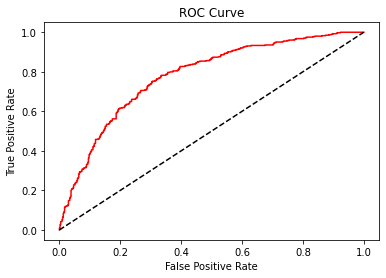

In [47]:
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred_score[:,1])  # roc_curve(y_true,y_score--probability) score implies prob

auc = roc_auc_score(y_train,y_train_pred_score[:,1])
print('AUC  :',auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')  #range on x and y axes
plt.xlabel('False Positive Rate') # or [1 - True Negative Rate]
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Test Data

In [50]:
y_test_pred = logistic_reg_model.predict(X_test)

### Confusion Matrix

In [55]:
print(confusion_matrix(y_test,y_test_pred))

[[68 38]
 [32 82]]


### Classification report

In [56]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       106
           1       0.68      0.72      0.70       114

    accuracy                           0.68       220
   macro avg       0.68      0.68      0.68       220
weighted avg       0.68      0.68      0.68       220



### Accuracy score

In [57]:
accuracy_score(y_test,y_test_pred)

0.6818181818181818

# 9. Model Deployment

In [58]:
dump(logistic_reg_model,open('claimants_intelligence.pkl','wb'))

In [59]:
loaded_logistic_reg_model = load(open('claimants_intelligence.pkl','rb'))

In [60]:
y_pred = loaded_logistic_reg_model.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.6818181818181818